Major improvement, val loss 0.07, remember that data is scalled based only on training data, prediction is for Closing Pri

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from itertools import chain
from keras.preprocessing.sequence import TimeseriesGenerator
from matplotlib import pyplot as plt
from tensorflow.keras import layers
df = pd.read_csv("drive/MyDrive/Engineer's Project/test.csv")

In [ ]:
df.pop('usa_cpi')
df.pop('pol_cpi')
df.pop('usa_inter')
df.pop('pol_inter')

0       5.82
1       5.82
2       5.82
3       5.82
4       5.82
        ... 
3537    4.83
3538    4.83
3539    4.83
3540    4.83
3541    4.83
Name: pol_inter, Length: 3542, dtype: float64

In [ ]:
df.pop('Date')
float_data = np.array(df).astype('float32')
mean = float_data[:2501].mean(axis=0)
std = float_data[:2501].std(axis=0)
float_data -= mean
float_data /= std

In [ ]:
lookback = 15
step = 1
delay = 1
min_index  = 0
max_index = 2500
#max_index  = 3541
batch_size = 128

In [ ]:
def generator(data, lookback, delay, min_index, max_index,shuffle=False, batch_size=128, step=1):
  if max_index is None:
    max_index = len(data) - delay - 1
  i = min_index + lookback
  while 1:
    if shuffle:
      rows = np.random.randint(
        min_index + lookback, max_index, size=batch_size)
    else:
      if i + batch_size >= max_index:
        i = min_index + lookback
      rows = np.arange(i, min(i + batch_size, max_index))
      i += len(rows)
    samples = np.zeros((len(rows),lookback // step,data.shape[-1]))
    targets = np.zeros((len(rows),))
    for j, row in enumerate(rows):
      indices = range(rows[j] - lookback, rows[j], step)
      samples[j] = data[indices]
      targets[j] = data[rows[j] + delay][3]
    yield samples, targets

In [ ]:
train_gen = generator(float_data,
lookback=lookback,
delay=delay,
min_index=0,
max_index=2501,
shuffle=True,
step=step,
batch_size=batch_size)

In [ ]:
val_gen = generator(float_data,
lookback=lookback,
delay=delay,
min_index=2501,
max_index=3001,
step=step,
batch_size=batch_size)

In [ ]:
test_gen = generator(float_data,
lookback=lookback,
delay=delay,
min_index=3001,
max_index=3541,
step=step,
batch_size=batch_size)

In [ ]:
val_steps = (3001 - 2501 - lookback)
test_steps = (len(float_data) - 3001 - lookback)

Model with simgoid activation

In [ ]:
model = tf.keras.models.Sequential()
model.add(layers.LSTM(11,
  activation='sigmoid',
  dropout=0.2,
  recurrent_dropout=0.2,
  input_shape=(None, float_data.shape[-1])))
model.add(layers.Dense(5,
  activation='sigmoid',))
model.add(layers.Dense(1))
model.compile(optimizer= tf.keras.optimizers.RMSprop(), loss='mae')
history = model.fit(train_gen,
  steps_per_epoch=200,
  epochs=200,
  validation_data=val_gen,
  validation_steps=val_steps)

Epoch 1/200
200/200 [==============================] - 7s 26ms/step - loss: 0.6457 - val_loss: 0.2966
Epoch 2/200
200/200 [==============================] - 4s 21ms/step - loss: 0.2235 - val_loss: 0.0726
Epoch 3/200
200/200 [==============================] - 4s 21ms/step - loss: 0.1483 - val_loss: 0.0651
Epoch 4/200
200/200 [==============================] - 5s 24ms/step - loss: 0.1252 - val_loss: 0.0582
Epoch 5/200
200/200 [==============================] - 4s 20ms/step - loss: 0.1156 - val_loss: 0.0607
Epoch 6/200
200/200 [==============================] - 4s 21ms/step - loss: 0.1084 - val_loss: 0.0663
Epoch 7/200
200/200 [==============================] - 4s 21ms/step - loss: 0.1043 - val_loss: 0.0616
Epoch 8/200
200/200 [==============================] - 4s 21ms/step - loss: 0.1013 - val_loss: 0.0549
Epoch 9/200
200/200 [==============================] - 4s 21ms/step - loss: 0.0988 - val_loss: 0.0483
Epoch 10/200
200/200 [==============================] - 5s 24ms/step - loss: 0.095

In [ ]:
eval = model.evaluate(test_gen, steps = test_steps)
eval *std[3]

526/526 [==============================] - 3s 5ms/step - loss: 0.0814


0.0304112269073753

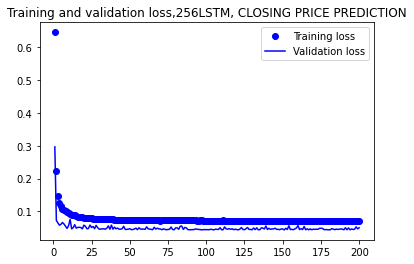

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss,256LSTM, CLOSING PRICE PREDICTION')
plt.legend()
plt.show()

Model with relu

In [ ]:
model1 = tf.keras.models.Sequential()
model1.add(layers.LSTM(11,
  activation='relu',
  dropout=0.2,
  recurrent_dropout=0.2,
  input_shape=(None, float_data.shape[-1])))
model1.add(layers.Dense(5,
    activation='relu'))
model1.add(layers.Dense(1))
model1.compile(optimizer= tf.keras.optimizers.RMSprop(), loss='mae')
history1 = model1.fit(train_gen,
  steps_per_epoch=200,
  epochs=200,
  validation_data=val_gen,
  validation_steps=val_steps)

Epoch 1/200
200/200 [==============================] - 7s 26ms/step - loss: 0.1872 - val_loss: 0.0550
Epoch 2/200
200/200 [==============================] - 4s 21ms/step - loss: 0.1074 - val_loss: 0.0513
Epoch 3/200
200/200 [==============================] - 5s 24ms/step - loss: 0.0940 - val_loss: 0.0811
Epoch 4/200
200/200 [==============================] - 5s 24ms/step - loss: 0.0893 - val_loss: 0.0821
Epoch 5/200
200/200 [==============================] - 4s 20ms/step - loss: 0.0854 - val_loss: 0.1352
Epoch 6/200
200/200 [==============================] - 5s 23ms/step - loss: 0.0830 - val_loss: 0.0820
Epoch 7/200
200/200 [==============================] - 5s 25ms/step - loss: 0.0821 - val_loss: 0.1017
Epoch 8/200
200/200 [==============================] - 4s 20ms/step - loss: 0.0808 - val_loss: 0.0838
Epoch 9/200
200/200 [==============================] - 4s 21ms/step - loss: 0.0807 - val_loss: 0.0797
Epoch 10/200
200/200 [==============================] - 4s 21ms/step - loss: 0.079

In [ ]:
eval1 = model1.evaluate(test_gen, steps = test_steps)
eval1 *std[3]

526/526 [==============================] - 2s 5ms/step - loss: 0.2036


0.07600975252278719

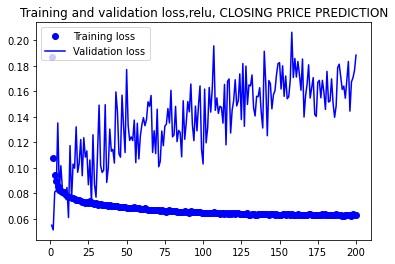

In [ ]:
loss1 = history1.history['loss']
val_loss1 = history1.history['val_loss']
epochs1 = range(1, len(loss1) + 1)
plt.figure()
plt.plot(epochs1, loss1, 'bo', label='Training loss')
plt.plot(epochs1, val_loss1, 'b', label='Validation loss')
plt.title('Training and validation loss,relu, CLOSING PRICE PREDICTION')
plt.legend()
plt.show()

model wiht simgoid and Adam()

In [ ]:
model2 = tf.keras.models.Sequential()
model2.add(layers.LSTM(11,
  activation='sigmoid',
  dropout=0.1,
  recurrent_dropout=0.1,
  input_shape=(None, float_data.shape[-1])))
model2.add(layers.Dense(5,
  activation='sigmoid',))
model2.add(layers.Dense(1))
model2.compile(optimizer= tf.keras.optimizers.Adam(), loss='mae')
history2 = model2.fit(train_gen,
  steps_per_epoch=400,
  epochs=200,
  validation_data=val_gen,
  validation_steps=val_steps)

Epoch 1/200
400/400 [==============================] - 9s 18ms/step - loss: 0.3921 - val_loss: 0.0654
Epoch 2/200
400/400 [==============================] - 6s 16ms/step - loss: 0.1112 - val_loss: 0.0487
Epoch 3/200
400/400 [==============================] - 6s 16ms/step - loss: 0.0901 - val_loss: 0.0491
Epoch 4/200
400/400 [==============================] - 7s 18ms/step - loss: 0.0851 - val_loss: 0.0454
Epoch 5/200
400/400 [==============================] - 6s 16ms/step - loss: 0.0825 - val_loss: 0.0500
Epoch 6/200
400/400 [==============================] - 6s 16ms/step - loss: 0.0808 - val_loss: 0.0522
Epoch 7/200
400/400 [==============================] - 6s 16ms/step - loss: 0.0783 - val_loss: 0.0555
Epoch 8/200
400/400 [==============================] - 7s 18ms/step - loss: 0.0775 - val_loss: 0.0463
Epoch 9/200
400/400 [==============================] - 6s 16ms/step - loss: 0.0758 - val_loss: 0.0462
Epoch 10/200
400/400 [==============================] - 7s 18ms/step - loss: 0.074

KeyboardInterrupt: ignored

Val loss lower than training, is it good? Cause of dropout?

In [ ]:
model3 = tf.keras.models.Sequential()
model3.add(layers.LSTM(128,
  activation='sigmoid',
  dropout=0.1,
  recurrent_dropout=0.1,
  input_shape=(None, float_data.shape[-1])))
model3.add(layers.Dense(5,
  activation='sigmoid',))
model3.add(layers.Dense(1))
model3.compile(optimizer= tf.keras.optimizers.Adam(), loss='mae')
history3 = model3.fit(train_gen,
  steps_per_epoch=400,
  epochs=20,
  validation_data=val_gen,
  validation_steps=val_steps)

Epoch 1/20
400/400 [==============================] - 23s 52ms/step - loss: 0.1766 - val_loss: 0.0600
Epoch 2/20
400/400 [==============================] - 21s 52ms/step - loss: 0.0853 - val_loss: 0.0614
Epoch 3/20
400/400 [==============================] - 21s 52ms/step - loss: 0.0789 - val_loss: 0.0673
Epoch 4/20
400/400 [==============================] - 22s 55ms/step - loss: 0.0751 - val_loss: 0.0565
Epoch 5/20
400/400 [==============================] - 21s 52ms/step - loss: 0.0730 - val_loss: 0.0588
Epoch 6/20
400/400 [==============================] - 21s 52ms/step - loss: 0.0714 - val_loss: 0.0487
Epoch 7/20
400/400 [==============================] - 21s 53ms/step - loss: 0.0699 - val_loss: 0.0453
Epoch 8/20
400/400 [==============================] - 21s 52ms/step - loss: 0.0694 - val_loss: 0.0554
Epoch 9/20
400/400 [==============================] - 21s 52ms/step - loss: 0.0685 - val_loss: 0.0600
Epoch 10/20
400/400 [==============================] - 21s 52ms/step - loss: 0.067

In [ ]:
eval3 = model3.evaluate(test_gen, steps = test_steps)
eval3 *std[3]

526/526 [==============================] - 6s 10ms/step - loss: 0.0759


0.028325735569215693

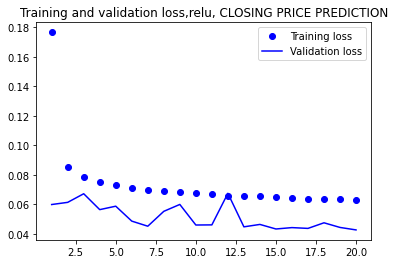

In [ ]:
loss3 = history3.history['loss']
val_loss3 = history3.history['val_loss']
epochs3 = range(1, len(loss3) + 1)
plt.figure()
plt.plot(epochs3, loss3, 'bo', label='Training loss')
plt.plot(epochs3, val_loss3, 'b', label='Validation loss')
plt.title('Training and validation loss,relu, CLOSING PRICE PREDICTION')
plt.legend()
plt.show()

In [ ]:
model4 = tf.keras.models.Sequential()
model4.add(layers.LSTM(32,
  activation='sigmoid',
  dropout=0.1,
  recurrent_dropout=0.1,
  return_sequences=True,
  input_shape=(None, float_data.shape[-1])))
model4.add(layers.LSTM(32,
  activation='sigmoid',
  dropout=0.1,
  recurrent_dropout=0.1,
  input_shape=(None, float_data.shape[-1])))
model4.add(layers.Dense(8,
  activation='sigmoid',))
model4.add(layers.Dense(1))
model4.compile(optimizer= tf.keras.optimizers.Adam(), loss='mae')
history4 = model4.fit(train_gen,
  steps_per_epoch=300,
  epochs=100,
  validation_data=val_gen,
  validation_steps=val_steps)

Epoch 1/100
300/300 [==============================] - 23s 55ms/step - loss: 0.2826 - val_loss: 0.1020
Epoch 2/100
300/300 [==============================] - 16s 54ms/step - loss: 0.1075 - val_loss: 0.0930
Epoch 3/100
300/300 [==============================] - 17s 55ms/step - loss: 0.0963 - val_loss: 0.0812
Epoch 4/100
300/300 [==============================] - 16s 52ms/step - loss: 0.0921 - val_loss: 0.0619
Epoch 5/100
300/300 [==============================] - 15s 51ms/step - loss: 0.0896 - val_loss: 0.0541
Epoch 6/100
300/300 [==============================] - 17s 56ms/step - loss: 0.0873 - val_loss: 0.0536
Epoch 7/100
300/300 [==============================] - 16s 52ms/step - loss: 0.0855 - val_loss: 0.0550
Epoch 8/100
300/300 [==============================] - 17s 56ms/step - loss: 0.0845 - val_loss: 0.0539
Epoch 9/100
300/300 [==============================] - 16s 53ms/step - loss: 0.0829 - val_loss: 0.0550
Epoch 10/100
300/300 [==============================] - 16s 55ms/step - l

In [ ]:
eval4 = model4.evaluate(test_gen, steps = test_steps)
eval4 *std[3]

526/526 [==============================] - 8s 15ms/step - loss: 0.0768


0.028660497461510115

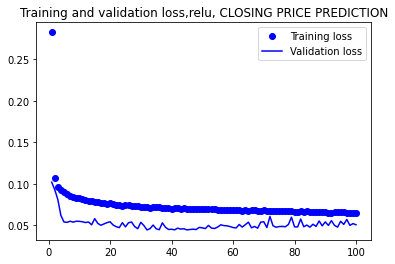

In [ ]:
loss4 = history4.history['loss']
val_loss4 = history4.history['val_loss']
epochs4 = range(1, len(loss4) + 1)
plt.figure()
plt.plot(epochs4, loss4, 'bo', label='Training loss')
plt.plot(epochs4, val_loss4, 'b', label='Validation loss')
plt.title('Training and validation loss,relu, CLOSING PRICE PREDICTION')
plt.legend()
plt.show()

In [ ]:
model5 = tf.keras.models.Sequential()
model5.add(layers.LSTM(32,
  activation='sigmoid',
  dropout=0.1,
  recurrent_dropout=0.1,
  return_sequences=True,
  input_shape=(None, float_data.shape[-1])))
model5.add(layers.LSTM(32,
  activation='sigmoid',
  dropout=0.1,
  recurrent_dropout=0.1,
  return_sequences=True,
  input_shape=(None, float_data.shape[-1])))
model5.add(layers.GRU(16,
  activation='sigmoid',
  dropout=0.1,
  recurrent_dropout=0.1,
  input_shape=(None, float_data.shape[-1])))
model5.add(layers.Dense(8,
  activation='sigmoid',))
model5.add(layers.Dense(4,
  activation='sigmoid',))
model5.add(layers.Dense(1))
model5.compile(optimizer= tf.keras.optimizers.Adam(), loss='mae')
history5 = model5.fit(train_gen,
  steps_per_epoch=300,
  epochs=100,
  validation_data=val_gen,
  validation_steps=val_steps)

Epoch 1/100
300/300 [==============================] - 32s 80ms/step - loss: 0.7286 - val_loss: 0.7261
Epoch 2/100
300/300 [==============================] - 23s 77ms/step - loss: 0.2912 - val_loss: 0.1479
Epoch 3/100
300/300 [==============================] - 23s 78ms/step - loss: 0.1602 - val_loss: 0.1039
Epoch 4/100
300/300 [==============================] - 24s 79ms/step - loss: 0.1197 - val_loss: 0.0620
Epoch 5/100
300/300 [==============================] - 23s 78ms/step - loss: 0.1069 - val_loss: 0.0578
Epoch 6/100
300/300 [==============================] - 24s 79ms/step - loss: 0.1012 - val_loss: 0.0603
Epoch 7/100
300/300 [==============================] - 24s 79ms/step - loss: 0.0968 - val_loss: 0.0707
Epoch 8/100
300/300 [==============================] - 24s 79ms/step - loss: 0.0944 - val_loss: 0.0583
Epoch 9/100
300/300 [==============================] - 23s 78ms/step - loss: 0.0911 - val_loss: 0.0554
Epoch 10/100
300/300 [==============================] - 23s 77ms/step - l

In [ ]:
eval5 = model5.evaluate(test_gen, steps = test_steps)
eval5 *std[3]

526/526 [==============================] - 11s 21ms/step - loss: 0.0864


0.032250424071999406

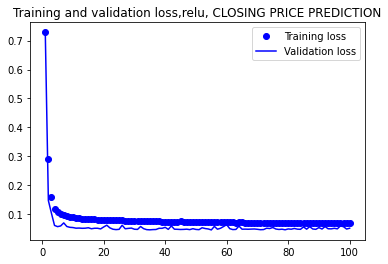

In [ ]:
loss5 = history5.history['loss']
val_loss5 = history5.history['val_loss']
epochs5 = range(1, len(loss5) + 1)
plt.figure()
plt.plot(epochs5, loss5, 'bo', label='Training loss')
plt.plot(epochs5, val_loss5, 'b', label='Validation loss')
plt.title('Training and validation loss,relu, CLOSING PRICE PREDICTION')
plt.legend()
plt.show()

In [ ]:
model6 = tf.keras.models.Sequential()
model6.add(layers.LSTM(32,
  activation='sigmoid',
  dropout=0.1,
  recurrent_dropout=0.1,
  return_sequences=True,
  input_shape=(None, float_data.shape[-1])))
model6.add(layers.LSTM(64,
  activation='sigmoid',
  dropout=0.1,
  recurrent_dropout=0.1,
  input_shape=(None, float_data.shape[-1])))
model6.add(layers.Dense(8,
  activation='sigmoid',))
model6.add(layers.Dense(1))
model6.compile(optimizer= tf.keras.optimizers.Adam(), loss='mae')
history6 = model6.fit(train_gen,
  steps_per_epoch=300,
  epochs=40,
  validation_data=val_gen,
  validation_steps=val_steps)

Epoch 1/40
300/300 [==============================] - 42s 116ms/step - loss: 0.3088 - val_loss: 0.0882
Epoch 2/40
300/300 [==============================] - 22s 75ms/step - loss: 0.1042 - val_loss: 0.0850
Epoch 3/40
300/300 [==============================] - 20s 66ms/step - loss: 0.0953 - val_loss: 0.0542
Epoch 4/40
300/300 [==============================] - 20s 66ms/step - loss: 0.0931 - val_loss: 0.0622
Epoch 5/40
300/300 [==============================] - 20s 67ms/step - loss: 0.0900 - val_loss: 0.0571
Epoch 6/40
300/300 [==============================] - 21s 70ms/step - loss: 0.0878 - val_loss: 0.0559
Epoch 7/40
300/300 [==============================] - 21s 71ms/step - loss: 0.0857 - val_loss: 0.0660
Epoch 8/40
300/300 [==============================] - 21s 71ms/step - loss: 0.0853 - val_loss: 0.0544
Epoch 9/40
300/300 [==============================] - 20s 67ms/step - loss: 0.0837 - val_loss: 0.0613
Epoch 10/40
300/300 [==============================] - 21s 71ms/step - loss: 0.08

In [ ]:
eval6 = model6.evaluate(test_gen, steps = test_steps)
eval6 *std[3]

526/526 [==============================] - 6s 11ms/step - loss: 0.0864


0.032249820396172524

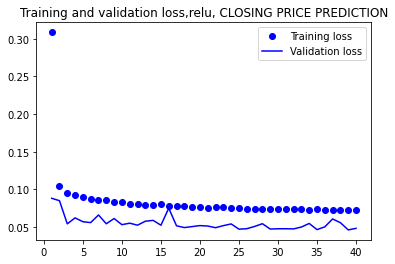

In [ ]:
loss6 = history6.history['loss']
val_loss6 = history6.history['val_loss']
epochs6 = range(1, len(loss6) + 1)
plt.figure()
plt.plot(epochs6, loss6, 'bo', label='Training loss')
plt.plot(epochs6, val_loss6, 'b', label='Validation loss')
plt.title('Training and validation loss,relu, CLOSING PRICE PREDICTION')
plt.legend()
plt.show()

In [ ]:
model7 = tf.keras.models.Sequential()
model7.add(layers.LSTM(64,
  activation='sigmoid',
  dropout=0.1,
  recurrent_dropout=0.1,
  return_sequences=True,
  input_shape=(None, float_data.shape[-1])))
model7.add(layers.LSTM(64,
  activation='sigmoid',
  dropout=0.1,
  recurrent_dropout=0.1,
  input_shape=(None, float_data.shape[-1])))
model7.add(layers.Dense(8,
  activation='sigmoid',))
model7.add(layers.Dense(1))
model7.compile(optimizer= tf.keras.optimizers.Adam(), loss='mae')
history7 = model7.fit(train_gen,
  steps_per_epoch=300,
  epochs=40,
  validation_data=val_gen,
  validation_steps=val_steps)

Epoch 1/40
300/300 [==============================] - 33s 89ms/step - loss: 0.2351 - val_loss: 0.1189
Epoch 2/40
300/300 [==============================] - 26s 87ms/step - loss: 0.1009 - val_loss: 0.0856
Epoch 3/40
300/300 [==============================] - 26s 87ms/step - loss: 0.0906 - val_loss: 0.0587
Epoch 4/40
300/300 [==============================] - 26s 87ms/step - loss: 0.0866 - val_loss: 0.0683
Epoch 5/40
300/300 [==============================] - 26s 86ms/step - loss: 0.0848 - val_loss: 0.0577
Epoch 6/40
300/300 [==============================] - 27s 88ms/step - loss: 0.0828 - val_loss: 0.0539
Epoch 7/40
300/300 [==============================] - 26s 85ms/step - loss: 0.0813 - val_loss: 0.0697
Epoch 8/40
300/300 [==============================] - 26s 86ms/step - loss: 0.0804 - val_loss: 0.1046
Epoch 9/40
300/300 [==============================] - 26s 86ms/step - loss: 0.0801 - val_loss: 0.0507
Epoch 10/40
300/300 [==============================] - 26s 86ms/step - loss: 0.078

In [ ]:
eval7 = model7.evaluate(test_gen, steps = test_steps)
eval7 *std[3]

526/526 [==============================] - 9s 17ms/step - loss: 0.0764


0.028526264438474502

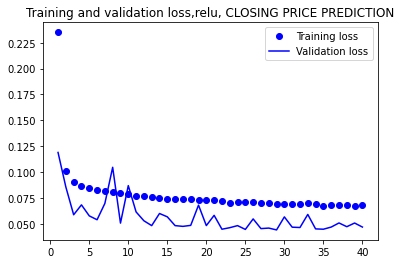

In [ ]:
loss7 = history7.history['loss']
val_loss7 = history7.history['val_loss']
epochs7 = range(1, len(loss7) + 1)
plt.figure()
plt.plot(epochs7, loss7, 'bo', label='Training loss')
plt.plot(epochs7, val_loss7, 'b', label='Validation loss')
plt.title('Training and validation loss,relu, CLOSING PRICE PREDICTION')
plt.legend()
plt.show()

In [ ]:
model8 = tf.keras.models.Sequential()
model8.add(layers.LSTM(64,
  activation='sigmoid',
  dropout=0.1,
  recurrent_dropout=0.1,
  return_sequences=True,
  input_shape=(None, float_data.shape[-1])))
model8.add(layers.LSTM(64,
  activation='sigmoid',
  dropout=0.1,
  recurrent_dropout=0.1,
  return_sequences=True,
  input_shape=(None, float_data.shape[-1])))
model8.add(layers.LSTM(64,
  activation='sigmoid',
  dropout=0.1,
  recurrent_dropout=0.1,
  input_shape=(None, float_data.shape[-1])))
model8.add(layers.Dense(8,
  activation='sigmoid',))
model8.add(layers.Dense(1))
model8.compile(optimizer= tf.keras.optimizers.Adam(), loss='mae')
history8 = model8.fit(train_gen,
  steps_per_epoch=300,
  epochs=40,
  validation_data=val_gen,
  validation_steps=val_steps)

Epoch 1/40
300/300 [==============================] - 51s 139ms/step - loss: 0.2838 - val_loss: 0.0952
Epoch 2/40
300/300 [==============================] - 42s 139ms/step - loss: 0.1085 - val_loss: 0.0711
Epoch 3/40
300/300 [==============================] - 42s 139ms/step - loss: 0.0983 - val_loss: 0.0629
Epoch 4/40
300/300 [==============================] - 40s 135ms/step - loss: 0.0939 - val_loss: 0.0743
Epoch 5/40
300/300 [==============================] - 41s 136ms/step - loss: 0.0902 - val_loss: 0.0595
Epoch 6/40
300/300 [==============================] - 40s 134ms/step - loss: 0.0880 - val_loss: 0.0726
Epoch 7/40
300/300 [==============================] - 40s 135ms/step - loss: 0.0853 - val_loss: 0.0581
Epoch 8/40
300/300 [==============================] - 41s 135ms/step - loss: 0.0846 - val_loss: 0.0712
Epoch 9/40
300/300 [==============================] - 40s 134ms/step - loss: 0.0837 - val_loss: 0.0547
Epoch 10/40
300/300 [==============================] - 40s 133ms/step - l

In [ ]:
eval8 = model8.evaluate(test_gen, steps = test_steps)
eval8 *std[3]

526/526 [==============================] - 10s 19ms/step - loss: 0.0820


0.030624419059417374

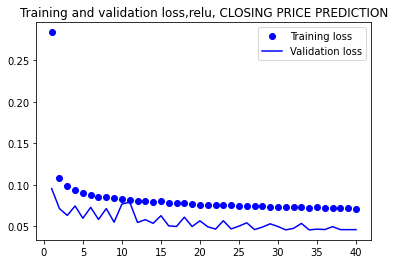

In [ ]:
loss8 = history8.history['loss']
val_loss8 = history8.history['val_loss']
epochs8 = range(1, len(loss8) + 1)
plt.figure()
plt.plot(epochs8, loss8, 'bo', label='Training loss')
plt.plot(epochs8, val_loss8, 'b', label='Validation loss')
plt.title('Training and validation loss,relu, CLOSING PRICE PREDICTION')
plt.legend()
plt.show()

In [ ]:
model9 = tf.keras.models.Sequential()
model9.add(layers.LSTM(64,
  activation='sigmoid',
  dropout=0.1,
  recurrent_dropout=0.1,
  return_sequences=True,
  input_shape=(None, float_data.shape[-1])))
model9.add(layers.LSTM(128,
  activation='sigmoid',
  dropout=0.1,
  recurrent_dropout=0.1,
  return_sequences=True,
  input_shape=(None, float_data.shape[-1])))
model9.add(layers.LSTM(64,
  activation='sigmoid',
  dropout=0.1,
  recurrent_dropout=0.1,
  input_shape=(None, float_data.shape[-1])))
model9.add(layers.Dense(16,
  activation='sigmoid',))
model9.add(layers.Dense(1))
model9.compile(optimizer= tf.keras.optimizers.Adam(), loss='mae')
history9 = model9.fit(train_gen,
  steps_per_epoch=300,
  epochs=40,
  validation_data=val_gen,
  validation_steps=val_steps)

Epoch 1/40
300/300 [==============================] - 66s 196ms/step - loss: 0.2498 - val_loss: 0.1324
Epoch 2/40
300/300 [==============================] - 60s 201ms/step - loss: 0.1027 - val_loss: 0.1148
Epoch 3/40
300/300 [==============================] - 58s 193ms/step - loss: 0.0951 - val_loss: 0.0758
Epoch 4/40
300/300 [==============================] - 57s 191ms/step - loss: 0.0915 - val_loss: 0.0621
Epoch 5/40
300/300 [==============================] - 58s 193ms/step - loss: 0.0895 - val_loss: 0.0561
Epoch 6/40
300/300 [==============================] - 58s 192ms/step - loss: 0.0867 - val_loss: 0.0656
Epoch 7/40
300/300 [==============================] - 58s 193ms/step - loss: 0.0855 - val_loss: 0.0544
Epoch 8/40
300/300 [==============================] - 58s 193ms/step - loss: 0.0838 - val_loss: 0.0846
Epoch 9/40
300/300 [==============================] - 58s 193ms/step - loss: 0.0851 - val_loss: 0.0572
Epoch 10/40
300/300 [==============================] - 58s 194ms/step - l

In [ ]:
eval9 = model9.evaluate(test_gen, steps = test_steps)
eval9 *std[3]

526/526 [==============================] - 25s 48ms/step - loss: 0.0923


0.03446183050359841

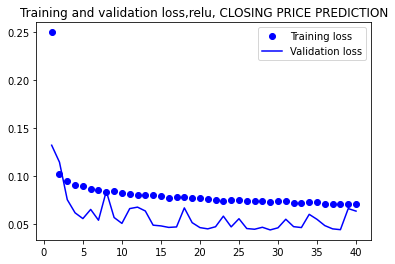

In [ ]:
loss9 = history9.history['loss']
val_loss9 = history9.history['val_loss']
epochs9 = range(1, len(loss9) + 1)
plt.figure()
plt.plot(epochs9, loss9, 'bo', label='Training loss')
plt.plot(epochs9, val_loss9, 'b', label='Validation loss')
plt.title('Training and validation loss,relu, CLOSING PRICE PREDICTION')
plt.legend()
plt.show()

In [ ]:
model10 = tf.keras.models.Sequential()
model10.add(layers.GRU(32,
  activation='sigmoid',
  dropout=0.1,
  recurrent_dropout=0.1,
  input_shape=(None, float_data.shape[-1])))
model10.add(layers.Dense(16,
  activation='sigmoid',))
model10.add(layers.Dense(1))
model10.compile(optimizer= tf.keras.optimizers.Adam(), loss='mae')
history10 = model10.fit(train_gen,
  steps_per_epoch=300,
  epochs=40,
  validation_data=val_gen,
  validation_steps=val_steps)

Epoch 1/40
300/300 [==============================] - 12s 30ms/step - loss: 0.2875 - val_loss: 0.0821
Epoch 2/40
300/300 [==============================] - 8s 28ms/step - loss: 0.0814 - val_loss: 0.0638
Epoch 3/40
300/300 [==============================] - 9s 28ms/step - loss: 0.0751 - val_loss: 0.0633
Epoch 4/40
300/300 [==============================] - 8s 28ms/step - loss: 0.0736 - val_loss: 0.0544
Epoch 5/40
300/300 [==============================] - 8s 27ms/step - loss: 0.0725 - val_loss: 0.0521
Epoch 6/40
300/300 [==============================] - 8s 27ms/step - loss: 0.0709 - val_loss: 0.0606
Epoch 7/40
300/300 [==============================] - 11s 37ms/step - loss: 0.0702 - val_loss: 0.0505
Epoch 8/40
300/300 [==============================] - 9s 31ms/step - loss: 0.0703 - val_loss: 0.0479
Epoch 9/40
300/300 [==============================] - 9s 30ms/step - loss: 0.0698 - val_loss: 0.0483
Epoch 10/40
300/300 [==============================] - 8s 28ms/step - loss: 0.0690 - val_

In [ ]:
eval10 = model10.evaluate(test_gen, steps = test_steps)
eval10 *std[3]

526/526 [==============================] - 3s 6ms/step - loss: 0.0809


0.030211229384120797

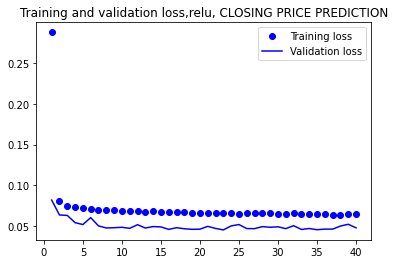

In [ ]:
loss10 = history10.history['loss']
val_loss10 = history10.history['val_loss']
epochs10 = range(1, len(loss10) + 1)
plt.figure()
plt.plot(epochs10, loss10, 'bo', label='Training loss')
plt.plot(epochs10, val_loss10, 'b', label='Validation loss')
plt.title('Training and validation loss,relu, CLOSING PRICE PREDICTION')
plt.legend()
plt.show()

In [ ]:
model11 = tf.keras.models.Sequential()
model11.add(layers.GRU(32,
  activation='sigmoid',
  dropout=0.1,
  recurrent_dropout=0.1,
  return_sequences=True,
  input_shape=(None, float_data.shape[-1])))
model11.add(layers.LSTM(128,
  activation='sigmoid',
  dropout=0.1,
  recurrent_dropout=0.1,
  return_sequences=True,
  input_shape=(None, float_data.shape[-1])))
model11.add(layers.GRU(64,
  activation='sigmoid',
  dropout=0.1,
  recurrent_dropout=0.1,
  input_shape=(None, float_data.shape[-1])))
model11.add(layers.Dense(16,
  activation='sigmoid',))
model11.add(layers.Dense(1))
model11.compile(optimizer= tf.keras.optimizers.Adam(), loss='mae')
history11 = model11.fit(train_gen,
  steps_per_epoch=300,
  epochs=60,
  validation_data=val_gen,
  validation_steps=val_steps)

Epoch 1/60
300/300 [==============================] - 105s 169ms/step - loss: 0.2584 - val_loss: 0.1375
Epoch 2/60
300/300 [==============================] - 49s 162ms/step - loss: 0.1072 - val_loss: 0.1040
Epoch 3/60
300/300 [==============================] - 49s 163ms/step - loss: 0.0978 - val_loss: 0.0961
Epoch 4/60
300/300 [==============================] - 49s 165ms/step - loss: 0.0949 - val_loss: 0.0783
Epoch 5/60
300/300 [==============================] - 49s 162ms/step - loss: 0.0914 - val_loss: 0.0562
Epoch 6/60
300/300 [==============================] - 49s 163ms/step - loss: 0.0890 - val_loss: 0.0543
Epoch 7/60
300/300 [==============================] - 48s 161ms/step - loss: 0.0872 - val_loss: 0.0837
Epoch 8/60
300/300 [==============================] - 48s 162ms/step - loss: 0.0854 - val_loss: 0.0526
Epoch 9/60
300/300 [==============================] - 49s 165ms/step - loss: 0.0846 - val_loss: 0.0552
Epoch 10/60
300/300 [==============================] - 49s 164ms/step - 

In [ ]:
eval11 = model11.evaluate(test_gen, steps = test_steps)
eval1 *std[3]

In [ ]:
loss10 = history10.history['loss']
val_loss10 = history10.history['val_loss']
epochs10 = range(1, len(loss10) + 1)
plt.figure()
plt.plot(epochs10, loss10, 'bo', label='Training loss')
plt.plot(epochs10, val_loss10, 'b', label='Validation loss')
plt.title('Training and validation loss,relu, CLOSING PRICE PREDICTION')
plt.legend()
plt.show()